# Øving 1, TMA4320

* **Veiledning:** Torsdag 9. januar, 0815-1000 i H3
* **Innleveringsfrist:** Torsdag 16. januar, kl 1400
* **Innleveringsmetode** Følgende to krav er nødvendig for godkjenning
    1. Opplasting av Jupyter Notebook (individuelt) i Blackboard
    2. Svare på skjema med kontrollspørsmål under Øving 1 i Blackboard


Vi skal gjøre en liten oppvarming med bruk av Jupyter Notebooks, men med lite teori siden vi ennå ikke har kommet ordentlig i gang. 

**Oppgave 0.**
Hvis du har installert Anaconda på din PC og har testet ut Jupyter Notebook, så trenger du ikke gjøre de første to punktene av denne oppgaven. I motsatt fall regner jeg med at du leser denne teksten som en webside (.html), og må da gjøre følgende for å kunne laste opp Øving 1.ipynb i Jupyter Notebook.
* Last ned og installer Anaconda på din PC, f.eks. fra [https://www.anaconda.com/download](https://www.anaconda.com/download "Lenke").
* Start Anaconda-applikasjonen, og klikk på "launch" i Jupyter Notebook boksen.
* Lagre filen "Øving 1.ipynb" fra Blackboard, og last den opp i Jupyter Notebook
* Gjør de andre oppgavene nedenfor ved å redigere denne filen, og lagre sluttresultatet
* Din ferdiglagede Notebook lastes så opp som svar på Øving 1
* I tillegg skal du forøvrig svare på tre kontrollspørsmål på et eget skjema i Blackboard. Spørsmålene finner du lenger ned i øvingen.

Jupyter Notebook har ulike typer *celler* eller avsnitt. Det du ser på nå er en såkalt Markdown-celle som brukes til å skrive tekst og formler. Markdownspråket er veldig enkelt å bruke og en kjapp innføring finner du
[her](https://daringfireball.net/projects/markdown/syntax#list "Markdown guide"). 

En annen celletype er "Code". Vi inkluderer en slik rett nedenfor der vi importerer et bibliotek som heter *numpy* (med alias np).


In [ ]:
import numpy as np

Merk at man utfører kode ved å taste Shift+Enter inne i en celle.

Å sette inn nye celler under eller over en annen celle gjøres enkelt ved velge "Insert" i menyen. Default celletype blir "Code", men du kan endre denne i rullgardinmenyen hvor det står "Code".

**Oppgave 1.** Et Python-bibliotek du skal bruke mye i dette kurset er *numpy*-biblioteket og vi har allerede vist hvordan du importerer dette. I dette biblioteket fins det meste av det du måtte trenge av numeriske metoder.
Et annet mye brukt bibliotek er *matplotlib* som kan plotte ulike grafer og figurer. *scipy* er et tredje bibliotek, men du kommer stort sett langt uten dette så lenge du har importert *numpy*.

Det fins utmerkede søkbare referansemanualer på nettet, se for eksempel
* [numpy](https://docs.scipy.org/doc/numpy/index.html "Numpy hovedside")
* [matplotlib](https://matplotlib.org/ "matplotlib")

I denne oppgaven skal du bytte kommentarene med kjørbar python-kode som gjør det kommentaren sier

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
-1.0 0.09966799462495582
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
[1.e+001 1.e+012 1.e+023 1.e+034 1.e+045 1.e+056 1.e+067 1.e+078 1.e+089
 1.e+100]


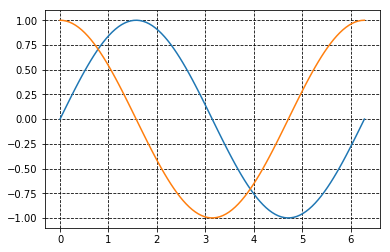

In [39]:
import numpy as np
import matplotlib.pyplot as plt

print(np.zeros(10), np.ones(10))
print(np.cos(np.pi), np.tanh(0.1))
print(np.linspace(1,10,10))
print(np.logspace(1,100,10))

array = np.linspace(0,np.pi*2,100)
sinus = np.sin(array)
cosinus = np.cos(array)
plt.plot(array, sinus)
plt.plot(array, cosinus)
plt.grid(axis="both", color='k', linestyle='dashed')
plt.show()


**Oppgave 2**

La oss forsøke å gjøre noe "fornuftig". Så langt har vi i timene lært om intervallhalveringsmetoden, så la oss lage en enkel implementasjon av denne. Vi søker nullpunkter i funksjonen
$$
f(x) = \frac12 + \frac25 x - \mathrm{e}^{-16x^2}
$$

**(a)** Start med å plotte å lage en Python-funksjon som definerer $f(x)$ og plott den i intervallet $[-2,2]$.

**Kontrollspørsmål 1** Hvor mange nullpunkter har $f(x)$ i dette intervallet sett ut fra grafen?


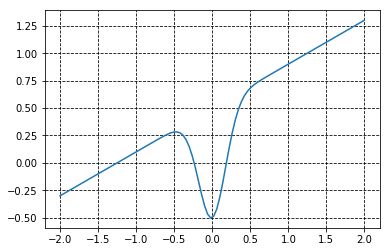

In [40]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    eksponent = -16*x**2
    return 1/2 + (2/5)*x-np.e**(eksponent)
verdier = np.linspace(-2,2,100)
funksjon = f(verdier)
plt.plot(verdier, funksjon)
plt.grid(axis="both", color='k', linestyle='dashed')
plt.show()
# Fyll inn Pythonkode som definerer f(x) angitt ovenfor
#
# Skriv her kode som plotter funksjonen f(x) mellom -2 og 2 (np.linspace er hendig)
# Kontrollspm. 1; Grafen har 3 nullpunkter i dette intervallet.

**(b)** Skriv en funksjon med navn *inthalv* som tar 4 inputargumenter, de er
* $f$: Funksjonen man skal finne nullpunkter av
* $a$: Venstre endepunkt i startintervallet
* $b$: Høyre endepunkt i startintervallet (må ha $f(a)\cdot f(b) < 0$)
* tol: En toleranse slik at $|r-m|<\mathrm{tol}$ der $r$ er roten og $m$ er midtpunktet av det siste beregnede intervallet

Funksjonen skal returnere midtpunktet $m$ i det sist beregnede intervallet, samt antall halveringer som er gjort.
Kjør så funksjonen med $f$ som ovenfor, $a=-1.5$, $b=1.5$, $\mathrm{tol}=10^{-7}$.

**Kontrollspørsmål 2** Er roten du får ut med disse inngangsverdiene større eller mindre enn $0.18613431$ ?

**Kontrollspørsmål 3** Hvor mange intervallhalveringer bruker funksjonen for å finne svaret?

In [47]:
#def inthalv(f,a,b,tol): osv
def inthalv(f,a,b,tol):
    k=0
    while (b-a)/2>tol:
        m = (a+b)/2
        if f(m)==0:
            return m
        elif f(a)*f(m)>0:
            a = m
        else:
            b=m
        k+=1
    return m,k
root, antall = inthalv(f,-1.5,1.5,10**(-7))            
print(root, antall)

# Skriv kode som definerer input og kaller inthalv her
# Kontrollspm. 2; Roten er større enn 0.18613431
# Kontrollspm. 3; Trenger 24 halveringer for å finne svaret med denne toleranseverdien.

0.18613439798355103 24
